# Question Paper 1

# 2-Mark Questions

# 1. What is DTM

A DTM is basically a matrix, with documents designated by rows and words by columns,
that the elements are the counts or the weights (usually by tf-idf).

Since rows contains documents and columns contains terms.

Hence the name Document Term matrix, whihc is used for classification / document clustering.

The matrix can be passed as an input to any machine learning algorithms.

DTM will be high dimensional data.

It is a sparse matrix.

Rows are vector representation of documents.

Columns are vector representation of terms.


# 2. What is tokenization, what are types tokenization?

Tokenization is the process of converting a text into tokens.

where tokens are the words / entities present in the text.

and text object is a sentence / a phrase or a word or an article.

Tokenization in python can be done by python’s NLTK library’s word_tokenize() function

We find out frequency of each token/word.

Example: 'I am happy'
          'I was happy'
          'I will be happy'
          
Now we treat each sentence as a separate document and we make a list of all words from all the four documents excluding the punctuation.

'I' , 'am','happy','was','will','be'

The next step is the create vectors. Vectors convert text that can be used by the machine learning algorithm

Let us take the first  document :  'I am happy'
we check the frequency of words from the 6 unique words.

I = 1
am=1
happy=1
was=0
will=0
be=0

from the above each word / token is called a gram. 
creating a vocabulary of two words is called bigram.


Types of tokens:

1) UniGram

2) BiGram

# 3. What is Bag of words?

Bag of Words is a method to extract features from text documents. 

It creates a vocabulary of all the unique words occurring in all the documents in the training set.

These features can be used for training machine learning algorithms.

 

# 4. What is sentiment analysis?

Sentimental analysis is the contextual mining of text, which identifies and extracts useful information from the source, which in turn helps to understand the business of social sentiment of the particular brand / monitoring online conversations like twitter.

Sentimental analysis is the most common text classification tool that analyses an incoming emessage / input and tells us whether the underlying sentiment is positive or negative or neutral.

Example:  I like India 

    where, I = neutral
        like=positive
        India=neutral
        
we find polarity score for the sentence

for the above word,

polarity score = 1-0=1

Since the polarity score is +1, the sentiment of the given sentence is positive
         

# 3-Mark Questions

# 1. What is vectorization, what are the different types of vectorization. Create a pseudo code,for any one of the vectorization types.

The process of converting text into vector is called as vectorization.

The different type of vectorization are:

    1) count vectorizer
    2) TFIDF vectorizer
    3) Hashing vectorizer
    
pseuod code:
    
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer().fit(train_docs_clean) 

dtm =vectorizer.transform(train_docs_clean)

dtm

# 2. Clean the below text by removing numbers using regular expressions. 
“Box A contains 3 red and 5 white balls, while Box B contains 4 red and 2 blue balls.”


In [1]:
import re

In [2]:
text="Box A contains 3 red and 5 white balls, while Box B contains 4 red and 2 blue balls."

In [3]:
result = re.sub(r'\d+', '', text)
print(result)

Box A contains  red and  white balls, while Box B contains  red and  blue balls.


# 3. In the below text, remove stop words and perform stemming.
“Python is an interpreted, object-oriented, high-level programming language with dynamic semantics. Its high-level built in data structures, combined with dynamic typing and dynamic binding, make it very attractive for Rapid Application Development, as well as for use as a scripting or glue language to connect existing components together.”


In [4]:
text1="Python is an interpreted, object-oriented, high-level programming language with dynamic semantics. Its high-level built in data structures, combined with dynamic typing and dynamic binding, make it very attractive for Rapid Application Development, as well as for use as a scripting or glue language to connect existing components together."

In [5]:
text1

'Python is an interpreted, object-oriented, high-level programming language with dynamic semantics. Its high-level built in data structures, combined with dynamic typing and dynamic binding, make it very attractive for Rapid Application Development, as well as for use as a scripting or glue language to connect existing components together.'

In [7]:
import nltk
stemmer=nltk.stem.PorterStemmer()
stopwords=nltk.corpus.stopwords.words('english')
def clean_sentence(doc):
    words=doc.split(' ')
    words_clean=[stemmer.stem(word) for word in words if word not in stopwords]
    doc_clean=' '.join(words_clean)
    return doc_clean
docs_clean=clean_sentence(text1)
docs_clean

'python interpreted, object-oriented, high-level program languag dynam semantics. it high-level built data structures, combin dynam type dynam binding, make attract rapid applic development, well use script glue languag connect exist compon together.'

After completing (question-3) step 3 create a word cloud.# After completing (question-3) step 3 create a word cloud.

In [8]:
from wordcloud import WordCloud

In [9]:
import matplotlib.pyplot as plt

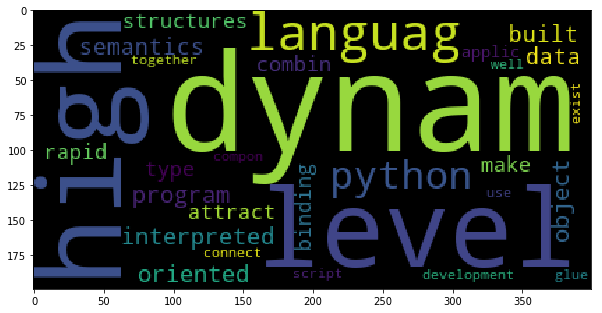

In [10]:
plt.figure(figsize=(10,10))
wc=WordCloud().generate(docs_clean)  
plt.imshow(wc)

5. Split the string at the first white-space character: “The rain in Spain”

In [11]:
str1='The rain in Spain'
str2=str1.split(' ')
print(str2[0])
str3=str2[1]+' '+str2[2]+' '+str2[3]
print(str3)

The
rain in Spain


# 7-Mark Questions

# . 1. For the given sentence “Hello Mr. Alex, how are you doing? The weather is great, and city is awesome. The sky is pinkish-blue, when do you come here?” 

In [12]:
str3="Hello Mr. Alex, how are you doing? The weather is great, and city is awesome. The sky is pinkish-blue, when do you come here?"

# a.	Find the frequency distribution and plot it.

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [14]:
model = CountVectorizer()
sparse_matrix = model.fit_transform([str3])
dtm = pd.DataFrame(sparse_matrix.toarray(),
                   columns=model.get_feature_names())

In [15]:
dtm

,alex,and,are,awesome,blue,city,come,do,doing,great,...,here,how,is,mr,pinkish,sky,the,weather,when,you
0,1,1,1,1,1,1,1,1,1,1,...,1,1,3,1,1,1,2,1,1,2


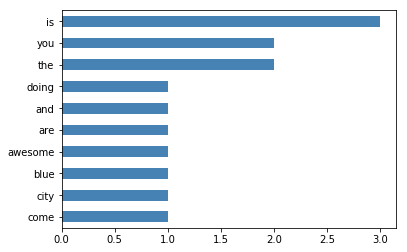

In [16]:
dtm.sum().sort_values(ascending=False).head(10)[::-1].plot.barh(color='steelblue')

# b)	Find the 3 of most frequent words

In [17]:
top3=pd.DataFrame(dtm.sum().sort_values(ascending=False))

In [18]:
top3.head(3)

,0
is,3
you,2
the,2


# 3 of the most frequent words are 

1) is

2) you

3) the

# c.	Remove the stop words and plot the frequency distribution.

In [19]:
stopwords=nltk.corpus.stopwords.words('english')

In [20]:
new=dtm.T

In [21]:
after_removing_stopwords=[x for x in new.index if x not in stopwords]

In [22]:
after_removing_stopwords

['alex',
 'awesome',
 'blue',
 'city',
 'come',
 'great',
 'hello',
 'mr',
 'pinkish',
 'sky',
 'weather']

In [23]:
sparse_matrix = model.fit_transform(after_removing_stopwords)
dtm1 = pd.DataFrame(sparse_matrix.toarray(),
                   columns=model.get_feature_names())

In [24]:
dtm1

,alex,awesome,blue,city,come,great,hello,mr,pinkish,sky,weather
0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,1,0


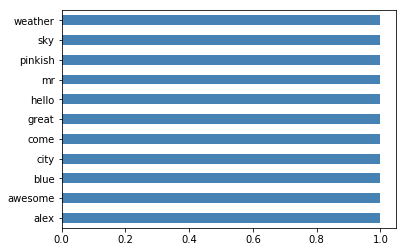

In [26]:
dtm1.sum().sort_values(ascending=False).head(20)[::-1].plot.barh(color='steelblue')

# e.Remove the words ‘great’ and ‘awesome’& create a word cloud.

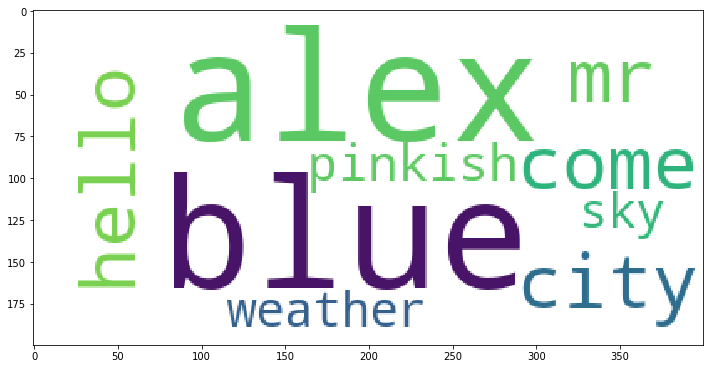

In [27]:
wc=WordCloud(background_color='white',stopwords=['awesome','great']).generate(' '.join(dtm1))
plt.figure(figsize=(12,10))
plt.imshow(wc)